In [1]:
!rm df-*-checkpoint.csv


zsh:1: no matches found: df-*-checkpoint.csv


In [21]:
import os
import glob

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load all datasets

In [3]:
all_files = glob.glob("*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df = df.drop_duplicates()
print(df.shape)

(1512, 20)


In [4]:
df['Orchestrator'] = df['Orchestrator'].astype('category')
df['Benchmark'] = df['Benchmark'].astype('category')
df['Exp'] = df['Exp'].astype('category')
df['Latency'] = df['Latency'].round(2)
df['Requests'] = df['Requests'].astype(int)

In [5]:
df["Requests"].head()

0    500
1    500
2    500
3    500
4    500
Name: Requests, dtype: int64

In [6]:
df.head()

,Latency,Requests,Throughput,Measured_Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,N,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
0,12.03,500,14828.0,9845,1,k8s,mm,1,exp15,1.0,1,1,1,8,512,30,4.922,23.600,1.927,493.94
1,11.85,500,14769.0,9852,1,k8s,hr,1,exp15,2.0,1,1,1,8,512,30,4.437,19.824,2.284,491.40
2,11.53,500,14767.0,9851,1,k8s,hr,1,exp15,3.0,1,1,1,8,512,30,4.381,22.864,2.248,491.20
3,12.00,500,14828.0,9843,1,k8s,hr,1,exp15,4.0,1,1,1,8,512,30,4.540,19.840,2.350,493.34
4,11.65,500,14769.0,9851,1,k8s,hr,1,exp15,5.0,1,1,1,8,512,30,4.357,24.208,2.281,491.40


In [7]:
df.shape

(1512, 20)

In [8]:
df.columns

Index(['Latency', 'Requests', 'Throughput', 'Measured_Throughput', 'Baseline',
       'Orchestrator', 'Benchmark', 'Infinite', 'Exp', 'N', 'Availability',
       'Horizontal', 'Vertical', 'Threads', 'Connections', 'Duration', 'Mean',
       'Max', 'StdDev', 'ReqSec'],
      dtype='object')

In [9]:
df_0 = df.loc[df['Exp'] == 'exp0']
df_1 = df.loc[df['Exp'] == 'exp1']
df_2 = df.loc[df['Exp'] == 'exp2']
df_3 = df.loc[df['Exp'] == 'exp3']
df_4 = df.loc[df['Exp'] == 'exp4']
df_5 = df.loc[df['Exp'] == 'exp5']
df_6 = df.loc[df['Exp'] == 'exp6']
df_7 = df.loc[df['Exp'] == 'exp7']
df_8 = df.loc[df['Exp'] == 'exp8']
df_9 = df.loc[df['Exp'] == 'exp9']
df_10 = df.loc[df['Exp'] == 'exp10']
df_11 = df.loc[df['Exp'] == 'exp11']

In [10]:
df_12 = df.loc[(df['Exp'] == 'exp12')]
df_13 = df.loc[(df['Exp'] == 'exp13')]
df_14 = df.loc[(df['Exp'] == 'exp14')]
df_15 = df.loc[(df['Exp'] == 'exp15')]
df_12_swarm = df.loc[(df['Exp'] == 'exp12') & (df['Orchestrator'] == 'swarm')]
df_13_swarm = df.loc[(df['Exp'] == 'exp13') & (df['Orchestrator'] == 'swarm')]
df_14_swarm = df.loc[(df['Exp'] == 'exp14') & (df['Orchestrator'] == 'swarm')]
df_15_swarm = df.loc[(df['Exp'] == 'exp15') & (df['Orchestrator'] == 'swarm')]
df_12_nomad = df.loc[(df['Exp'] == 'exp12') & (df['Orchestrator'] == 'nomad')]
df_13_nomad = df.loc[(df['Exp'] == 'exp13') & (df['Orchestrator'] == 'nomad')]
df_14_nomad = df.loc[(df['Exp'] == 'exp14') & (df['Orchestrator'] == 'nomad')]
df_15_nomad = df.loc[(df['Exp'] == 'exp15') & (df['Orchestrator'] == 'nomad')]
df_12_k8s = df.loc[(df['Exp'] == 'exp12') & (df['Orchestrator'] == 'k8s')]
df_13_k8s = df.loc[(df['Exp'] == 'exp13') & (df['Orchestrator'] == 'k8s')]
df_14_k8s = df.loc[(df['Exp'] == 'exp14') & (df['Orchestrator'] == 'k8s')]
df_15_k8s = df.loc[(df['Exp'] == 'exp15') & (df['Orchestrator'] == 'k8s')]

In [11]:
# Global settings
fontsize = 20
legend_location = "lower right"

In [18]:
def barplot(df, labels, fontsize=20):
    fig, ax = plt.subplots(figsize=(8,8))

    p1 = ax.bar(labels[1], df['Latency'][0], label=labels[0])
    p2 = ax.bar(labels[0], df['Latency'][1], label=labels[1])
    p3 = ax.bar(labels[2], df['Latency'][2], label=labels[2])
    ax.legend().remove()

    # Label with label_type 'center' instead of the default 'edge'
    ax.bar_label(p1, label_type='edge', fontsize=fontsize)
    ax.bar_label(p2, label_type='edge', fontsize=fontsize)
    ax.bar_label(p3, label_type='edge', fontsize=fontsize)


    plt.ylim(0,15)
    # ax.grid()
    xticks = [int(tick) for tick in ax.get_xticks()]
    ax.set_xlabel('Benchmarks', fontsize=fontsize)
    ax.set_ylabel('99th Percentile Tail Latency (ms)', fontsize=fontsize+5)

    plt.yticks(fontsize=fontsize)
    plt.xticks(xticks, fontsize=fontsize)
    # plt.legend(loc="upper right", fontsize=fontsize+5)
    # plt.legend(

    plt.tight_layout()
    plt.savefig("Figures/exp0.png", bbox_inches='tight')

    plt.show()

def plot_thr_req(tail_data, labels, legend_location,legend_fontsize=fontsize):
    # general setup
    fig, ax = plt.subplots(figsize=(16,8))

    # create new relevant labels
    data = pd.concat(tail_data)
    data['filename'] = labels
    data = data.sort_values(by='Requests').reset_index(drop=True)

    # labels = data['Orchestrator'].unique() 
    labels = ["swarm","k8s", "nomad"]
    lines = ["-","--","-.",":"]
    markers = ["o","v","^","<",">","8","s","p","*","h","H","D","d","P","X"]
    orchestrator = data['Orchestrator'].unique()[0]
    benchmark = data['Benchmark'].unique()[0]

    for mark, orch in enumerate(labels):
        plot_data = data.loc[data['Orchestrator'] == orch]
        ax.plot(plot_data['Requests'], plot_data['Throughput'], label=f"{benchmark}-{orch}-baseline", linestyle=lines[mark % len(markers)])

    # set axis and legend
    ax.grid()
    ax.set_xlim(left=0)
    ax.set_xlabel('Requests', fontsize=fontsize)
    ax.set_ylabel('Throughput', fontsize=fontsize)
    ax.set_title('Throughput versus Requests', fontsize=fontsize)

    xticks = [int(tick) for tick in ax.get_xticks()]
    plt.yticks(fontsize=fontsize)
    plt.xticks(xticks, fontsize=fontsize)
    plt.legend(loc=legend_location, fontsize=legend_fontsize)

    return fig, ax

def plot_lat_req_all(data, labels, legend_location,legend_fontsize=fontsize):
    # general setup
    fig, ax = plt.subplots(figsize=(16,8))

    # labels
    labels = ["swarm","k8s", "nomad"]
    lines = ["-","--","-.",":"]
    markers = ["o","v","^","<",">","8","s","p","*","h","H","D","d","P","X"]
    benchmark = data['Benchmark'].unique()[0]

    print("Multiple orchestrators one benchmark and one param")
    for mark, orch in enumerate(labels):
        plot_data = data.loc[data['Orchestrator'] == orch]
        vertical = plot_data['Vertical'].unique()[0]
        horizontal = plot_data['Horizontal'].unique()[0]
        availability = plot_data['Availability'].unique()[0]
        baseline = plot_data['Baseline'].unique()[0]
        if vertical == 0:
            print("vertical")
            ax.plot(plot_data['Requests'], plot_data['Latency'], label=f"{benchmark}-{orch}-vertical", linestyle=lines[mark % len(markers)])
        elif  horizontal == 0:
            print("horizontal")
            ax.plot(plot_data['Requests'], plot_data['Latency'], label=f"{benchmark}-{orch}-horizontal", linestyle=lines[mark % len(markers)])
        elif availability == 1 and baseline == 1:
            print("availability")
            ax.plot(plot_data['Requests'], plot_data['Latency'], label=f"{benchmark}-{orch}-availability", linestyle=lines[mark % len(markers)])
        else:
            print("baseline")
            ax.plot(plot_data['Requests'], plot_data['Latency'], label=f"{benchmark}-{orch}-baseline", linestyle=lines[mark % len(markers)])

    # set axis and legend
    ax.grid()
    ax.set_xlim(left=0)
    ax.set_xlabel('Requests', fontsize=fontsize)
    ax.set_ylabel('Latency (milliseconds)', fontsize=fontsize)
    ax.set_title('Latency versus Requests', fontsize=fontsize)

    xticks = [int(tick) for tick in ax.get_xticks()]
    plt.yticks(fontsize=fontsize)
    plt.xticks(xticks, fontsize=fontsize)
    # plt.legend(loc=legend_location, fontsize=legend_fontsize)

    return fig, ax
    

def plot_lat_req(data, labels, legend_location,legend_fontsize=fontsize):
    # general setup
    fig, ax = plt.subplots(figsize=(16,8))


    labels = data['Benchmark'].unique() 
    lines = ["-","--","-.",":"]
    markers = ["o","v","^","<",">","8","s","p","*","h","H","D","d","P","X"]
    orchestrator = data['Orchestrator'].unique()[0]

    # one benchmark but multiple params
    if len(labels) == 1:
        print("one benchmark but multiple params")
        for benchmark in labels:
            for mark, param in enumerate(['Horizontal', 'Vertical', 'Availability','Baseline']):
                plot_data = data.loc[data['Benchmark'] == benchmark]
                if len(plot_data[param].unique()) == 0:
                    continue

                if param == 'Availability':
                    plot_data = plot_data.loc[plot_data[param] == 1]
                    if plot_data[param].unique() == 1:
                        ax.plot(plot_data['Requests'], plot_data['Latency'], label=f"{benchmark}-{orchestrator}-{param.lower}", linestyle=lines[mark % len(markers)])
                else:
                    plot_data = plot_data.loc[plot_data[param] == 0]
                    if plot_data[param].unique() == 0:
                        ax.plot(plot_data['Requests'], plot_data['Latency'], label=f"{benchmark}-{orchestrator}-{param}", linestyle=lines[mark % len(markers)])
    # multiple benchmarks but one params
    else:
        print("Multiple benchmarks but one param")
        for mark, benchmark in enumerate(labels):
                plot_data = data.loc[data['Benchmark'] == benchmark]
                ax.plot(plot_data['Requests'], plot_data['Latency'], label=f"{benchmark}-{orchestrator}", linestyle=lines[mark % len(markers)])
    # ax.plot(data['Requests'], data['Latency'])

    
    # set axis and legend
    ax.grid()
    # sb.despine(ax=ax, offset=0)
    ax.set_xlim(left=0)
    ax.set_xlabel('Requests', fontsize=fontsize)
    ax.set_ylabel('Tail latency 99th Percentile (ms)', fontsize=fontsize)
    ax.set_title('Latency versus Requests', fontsize=fontsize)

    xticks = [int(tick) for tick in ax.get_xticks()]
    # print(xticks)
    # yticks = [int(tick) for tick in ax.get_yticks()]
    # print(xticks, yticks)
    # plt.yticks(yticks, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    # plt.xticks(xticks, fontsize=fontsize)
    plt.xticks(xticks, fontsize=fontsize)
    plt.legend(loc=legend_location, fontsize=legend_fontsize)

    return fig, ax

In [14]:
df_0

,Latency,Requests,Throughput,Measured_Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,N,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
0,12.70,200,5993.0,3989,0,swarm,hr,0,exp0,NaN,0,1,1,4,8,30,4.074,27.856,2.892,199.73
1,9.29,200,5993.0,3990,0,swarm,mm,0,exp0,NaN,0,1,1,4,8,30,4.150,28.336,1.433,199.75
2,7.97,200,5993.0,3989,0,swarm,sn,0,exp0,NaN,0,1,1,4,8,30,2.550,10.344,1.563,199.72


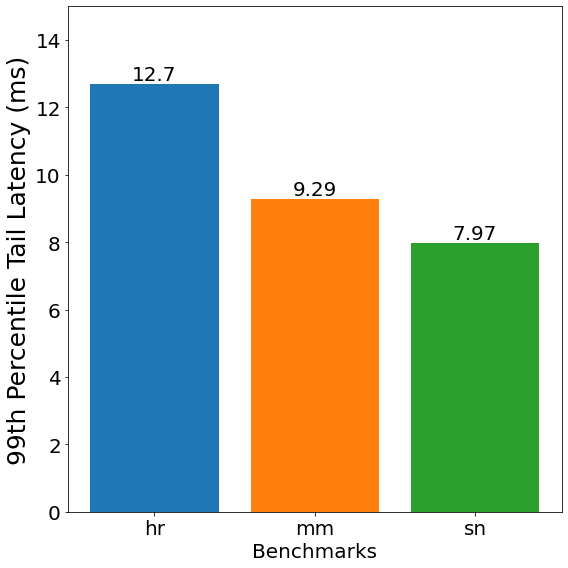

In [19]:
labels = df['Benchmark'].unique()
barplot(df_0, labels, fontsize)

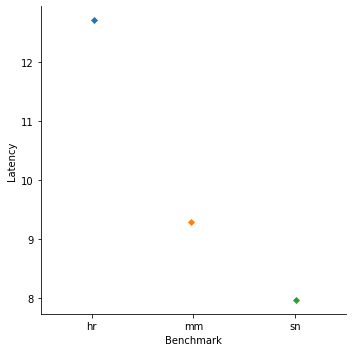

In [178]:
sns.catplot(x="Benchmark", y="Latency", data=df_0, hue="Benchmark", marker="D")

Multiple benchmarks but one param


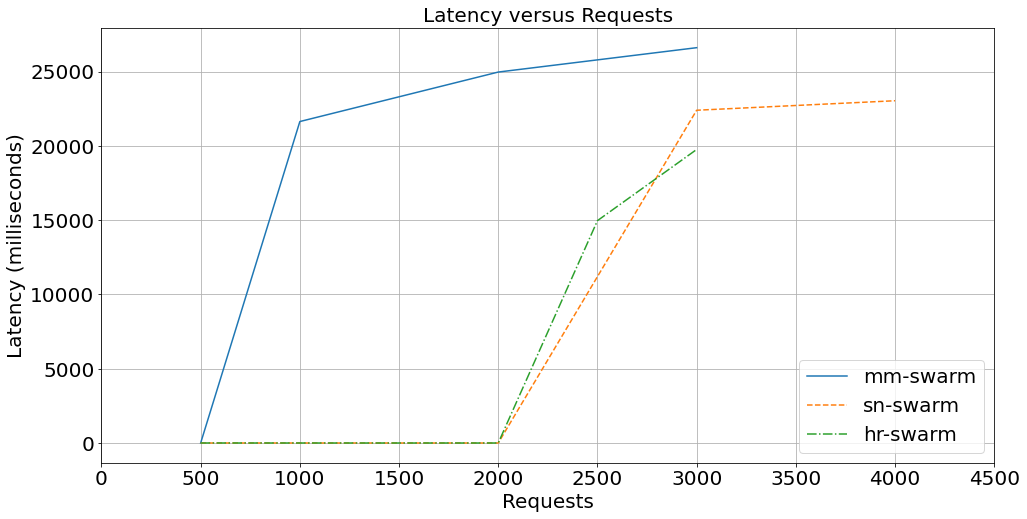

In [14]:
fig, ax = plot_lat_req(df_12_swarm, labels, legend_location, fontsize)

Multiple orchestrators one benchmark and one param
baseline
baseline
baseline


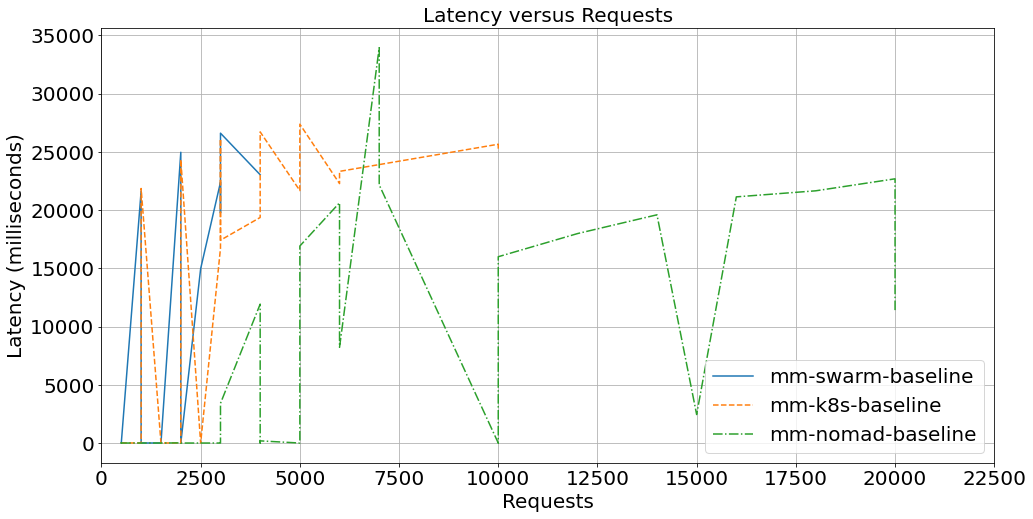

In [15]:
legend_location = "lower right"
fig, ax = plot_lat_req_all(df_12, labels, legend_location, fontsize)

In [16]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# Exp1 Params exploring 
Requests 500 1000 1500 2000 2500 3000
Connections 128 512 1024 2048
threads  4 8 16

In [27]:
df_1 = df.loc[df['Exp'] == 'exp1']
df_1.shape

(40, 20)

In [28]:
df_1.loc[:,['Latency','Benchmark','Throughput','Requests', 'Threads', 'Connections']].head()

,Latency,Benchmark,Throughput,Requests,Threads,Connections
0,9.15,hr,5755.0,200,16,16
1,7.73,sn,5907.0,200,4,512
2,8.00,sn,2905.0,200,4,2048
3,7.85,sn,5995.0,200,4,16
4,8.01,sn,5934.0,200,4,128


In [29]:
df_1.columns

Index(['Latency', 'Requests', 'Throughput', 'Measured_Throughput', 'Baseline',
       'Orchestrator', 'Benchmark', 'Infinite', 'Exp', 'N', 'Availability',
       'Horizontal', 'Vertical', 'Threads', 'Connections', 'Duration', 'Mean',
       'Max', 'StdDev', 'ReqSec'],
      dtype='object')

In [36]:
df_1_req = df_1.loc[(df_1['Threads' ]== 4) & (df_1['Connections'] == 8)]
df_1_con = df_1.loc[(df_1['Threads' ] == 4) & (df_1['Requests'] == 200)]
df_1_con['Benchmark'] = df_1_con['Benchmark'].cat.remove_unused_categories()
df_1_thr = df_1.loc[(df_1['Connections'] == 16) & (df_1['Requests'] == 200)]

/var/folders/nv/p_yx9k0j763cnbwqk5j012t80000gn/T/ipykernel_37001/4161224814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_con['Benchmark'] = df_1_con['Benchmark'].cat.remove_unused_categories()


In [37]:
df_1_con.groupby('Benchmark')

df_1_con = df_1_con.drop(13)

In [38]:
df_1_con

,Latency,Requests,Throughput,Measured_Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,N,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
1,7.73,200,5907.0,3915,0,swarm,sn,1,exp1,1.0,0,1,1,4,512,30,2.826,9.584,1.801,196.05
2,8.00,200,2905.0,1943,0,swarm,sn,1,exp1,1.0,0,1,1,4,2048,30,3.613,9.320,2.035,96.66
3,7.85,200,5995.0,3993,0,swarm,sn,1,exp1,1.0,0,1,1,4,16,30,2.484,11.552,1.581,199.80
4,8.01,200,5934.0,3973,0,swarm,sn,1,exp1,1.0,0,1,1,4,128,30,2.290,11.824,1.552,197.62
5,7.59,200,5808.0,3845,0,swarm,sn,1,exp1,1.0,0,1,1,4,1024,30,3.245,9.048,1.911,193.32
9,4.80,200,5950.0,3919,0,swarm,mm,0,exp1,1.0,0,1,1,4,512,30,3.611,8.172,0.505,198.07
10,5.31,200,2943.0,1940,0,swarm,mm,0,exp1,1.0,0,1,1,4,2048,30,4.138,5.744,0.555,97.94
11,6.48,200,5995.0,3992,0,swarm,mm,0,exp1,1.0,0,1,1,4,16,30,3.654,10.800,0.695,199.80
12,4.86,200,5973.0,3967,0,swarm,mm,0,exp1,1.0,0,1,1,4,128,30,3.547,7.432,0.513,198.89
15,10.70,200,5808.0,3845,0,swarm,hr,1,exp1,1.0,0,1,1,4,1024,30,3.435,14.848,2.210,193.38


## Lineplots

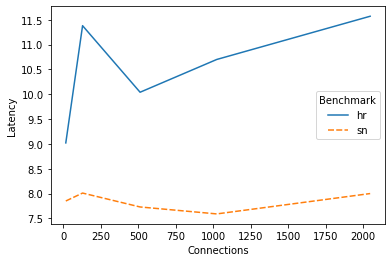

In [134]:
ax = sns.lineplot(x="Connections", y="Latency", data=df_1_con, hue="Benchmark", style='Benchmark')

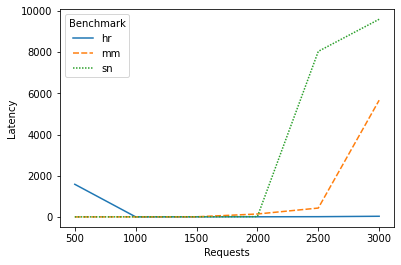

In [135]:
ax = sns.lineplot(x="Requests", y="Latency", data=df_1_req, hue="Benchmark", style='Benchmark')

In [1]:
hue_order=['sn','mm','hr']
ax = sns.barplot(x="Requests", y="Latency", data=df_1_req, hue="Benchmark", hue_order=hue_order)

NameError: name 'sns' is not defined

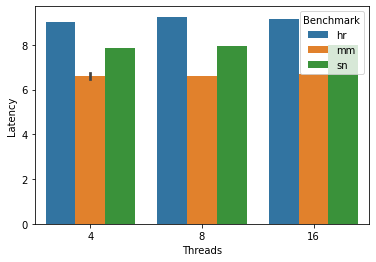

In [31]:
ax = sns.barplot(x="Threads", y="Latency", data=df_1_thr, hue="Benchmark")

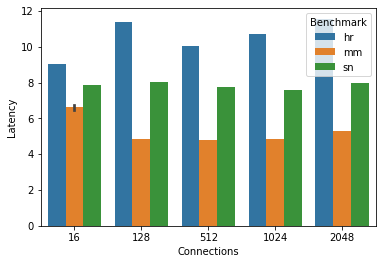

In [34]:
ax = sns.barplot(x="Connections", y="Latency", data=df_1_con, hue="Benchmark")

In [188]:
ax1

<AxesSubplot:xlabel='Requests', ylabel='Latency (milliseconds)'>

In [187]:
ax[0]

<AxesSubplot:xlabel='Requests', ylabel='Latency (milliseconds)'>

In [39]:
df_1_thr = df_1_thr.drop(11)

In [40]:
df_1_thr

,Latency,Requests,Throughput,Measured_Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,N,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
0,9.15,200,5755.0,3827,0,swarm,hr,1,exp1,1.0,0,1,1,16,16,30,3.212,12.336,1.936,191.82
3,7.85,200,5995.0,3993,0,swarm,sn,1,exp1,1.0,0,1,1,4,16,30,2.484,11.552,1.581,199.80
6,8.01,200,5755.0,3826,0,swarm,sn,1,exp1,1.0,0,1,1,16,16,30,3.387,12.224,1.898,191.80
7,6.61,200,5995.0,3992,0,swarm,mm,1,exp1,1.0,0,1,1,8,16,30,3.787,9.648,0.686,199.81
8,6.70,200,5755.0,3826,0,swarm,mm,1,exp1,1.0,0,1,1,16,16,30,3.758,9.992,0.682,191.82
13,6.74,200,5995.0,3992,0,swarm,mm,1,exp1,1.0,0,1,1,4,16,30,3.765,10.968,0.704,199.79
14,9.26,200,5995.0,3994,0,swarm,hr,1,exp1,1.0,0,1,1,8,16,30,3.230,13.296,2.024,199.80
17,9.02,200,5995.0,3992,0,swarm,hr,1,exp1,1.0,0,1,1,4,16,30,3.212,15.904,1.913,199.78
21,7.96,200,5995.0,3991,0,swarm,sn,1,exp1,1.0,0,1,1,8,16,30,3.047,13.640,1.869,199.80


In [42]:
df_1_req.sort_values('Benchmark')

,Latency,Requests,Throughput,Measured_Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,N,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
39,38.01,3000,90060.0,60119,0,swarm,hr,1,exp1,1.0,0,1,1,4,8,30,9.463,69.888,8.267,3001.96
24,1590.00,500,14386.0,9756,0,swarm,hr,1,exp1,1.0,0,1,1,4,8,30,1197.858,1692.672,170.515,479.46
36,17.93,2500,75108.0,50233,0,swarm,hr,1,exp1,1.0,0,1,1,4,8,30,4.804,34.752,3.747,2503.61
26,8.62,1000,29940.0,20018,0,swarm,hr,1,exp1,1.0,0,1,1,4,8,30,2.620,16.464,1.801,997.91
28,9.94,1500,44793.0,29806,0,swarm,hr,1,exp1,1.0,0,1,1,4,8,30,2.858,19.648,2.044,1492.93
33,12.34,2000,59805.0,40000,0,swarm,hr,1,exp1,1.0,0,1,1,4,8,30,3.459,23.280,2.562,1993.42
37,5670.00,3000,73634.0,49265,0,swarm,mm,1,exp1,1.0,0,1,1,4,8,30,3280.565,5947.392,1079.832,2454.47
34,436.22,2500,74593.0,49850,0,swarm,mm,1,exp1,1.0,0,1,1,4,8,30,168.091,495.616,113.228,2486.46
32,148.35,2000,59796.0,40000,0,swarm,mm,1,exp1,1.0,0,1,1,4,8,30,11.965,209.920,23.753,1993.26
22,6.42,500,14982.0,9999,0,swarm,mm,1,exp1,1.0,0,1,1,4,8,30,3.124,16.592,0.869,499.38


In [35]:
df_1_req.groupby('Benchmark').show()


AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

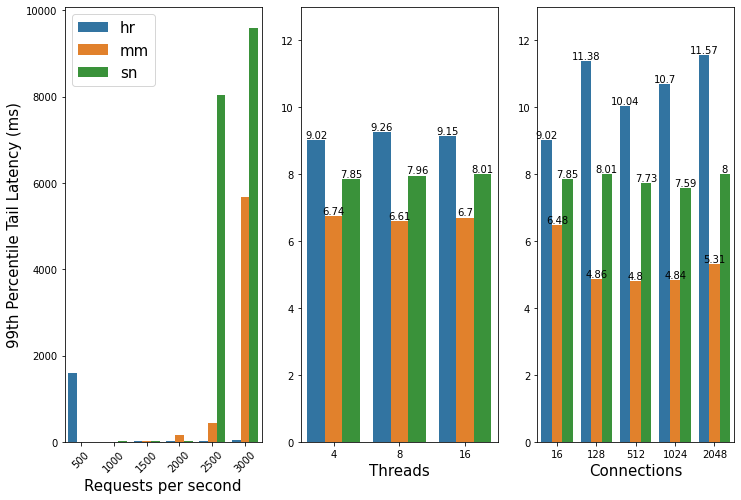

In [44]:
def plot_exp1():
    hue_order=['hr','mm','sn']
    
    fig, ax = plt.subplots(1,3, figsize=(12,8))
    plt.figure(1)
    plt.subplot(131)
    ax1 = sns.barplot(x="Requests", y="Latency", data=df_1_req, hue="Benchmark", hue_order=hue_order)
    ax1.legend(fontsize=15)
    ax1.set_ylabel("99th Percentile Tail Latency (ms)",fontsize=15)
    ax1.set_xlabel("Requests per second", fontsize=15)
    # ax1.bar_label(ax1.containers[0])
    # ax1.bar_label(ax1.containers[1])
    # ax1.bar_label(ax1.containers[2])
    # ax[0].bar_label(ax1)
    # ax1.bar_label(ax1, label_type='edge', fontsize=fontsize)


    plt.xticks(rotation = 45)


    plt.subplot(132)
    ax2 = sns.barplot(x="Threads", y="Latency", data=df_1_thr, hue="Benchmark", hue_order=hue_order)
    ax2.get_legend().remove()
    # xticks = [int(tick) for tick in ax2.get_xticks()]
    ax2.set_ylabel("")
    ax2.set_xlabel("Threads", fontsize=15)
    ax2.bar_label(ax2.containers[0])
    ax2.bar_label(ax2.containers[1])
    ax2.bar_label(ax2.containers[2])


    # plt.tick_params(left = False)
    # ax.axes.yaxis.set_ticks([])
    plt.ylim(0,13)

    plt.subplot(133)
    ax3 = sns.barplot(x="Connections", y="Latency", data=df_1_con, hue="Benchmark", hue_order=hue_order)
    ax3.get_legend().remove()
    ax3.set_ylabel("")
    yticks = [int(tick) for tick in ax3.get_yticks()]
    ax3.bar_label(ax3.containers[0])
    ax3.bar_label(ax3.containers[1])
    ax3.bar_label(ax3.containers[2])
    # ax3.set_yticklabels(yticks, fontsize=15)

    ax3.set_xlabel("Connections", fontsize=15)

    # ax3.set_xlabel(fontsize=15)
    # plt.xlabel(fontsize=15)
    plt.ylim(0,13)
    # plt.show()
    plt.savefig("Figures/exp1-Req-Thr-Con-July2024png", bbox_inches='tight')

plot_exp1()

In [35]:
df.columns

Index(['Latency', 'Requests', 'Throughput', 'Measured_Throughput', 'Baseline',
       'Orchestrator', 'Benchmark', 'Infinite', 'Exp', 'N', 'Availability',
       'Horizontal', 'Vertical', 'Threads', 'Connections', 'Duration', 'Mean',
       'Max', 'StdDev', 'ReqSec'],
      dtype='object')

In [71]:
df_1_con 

,Latency,Requests,Throughput,Measured_Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,N,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
5,7.59,200,5808.0,3845,0,swarm,sn,1,exp1,NaN,0,1,1,4,1024,30,3.245,9.048,1.911,193.32
6,8.01,200,5934.0,3973,0,swarm,sn,1,exp1,NaN,0,1,1,4,128,30,2.290,11.824,1.552,197.62
7,8.00,200,2905.0,1943,0,swarm,sn,1,exp1,NaN,0,1,1,4,2048,30,3.613,9.320,2.035,96.66
9,7.73,200,5907.0,3915,0,swarm,sn,1,exp1,NaN,0,1,1,4,512,30,2.826,9.584,1.801,196.05
10,7.85,200,5995.0,3993,0,swarm,sn,1,exp1,NaN,0,1,1,4,16,30,2.484,11.552,1.581,199.80
12,10.70,200,5808.0,3845,0,swarm,hr,1,exp1,NaN,0,1,1,4,1024,30,3.435,14.848,2.210,193.38
13,11.38,200,5973.0,3971,0,swarm,hr,1,exp1,NaN,0,1,1,4,128,30,3.470,48.224,2.571,198.89
14,10.04,200,5908.0,3915,0,swarm,hr,1,exp1,NaN,0,1,1,4,512,30,3.400,19.008,2.183,196.24
15,11.57,200,2903.0,1941,0,swarm,hr,1,exp1,NaN,0,1,1,4,2048,30,3.741,19.680,2.383,96.21
16,9.02,200,5995.0,3992,0,swarm,hr,1,exp1,NaN,0,1,1,4,16,30,3.212,15.904,1.913,199.78


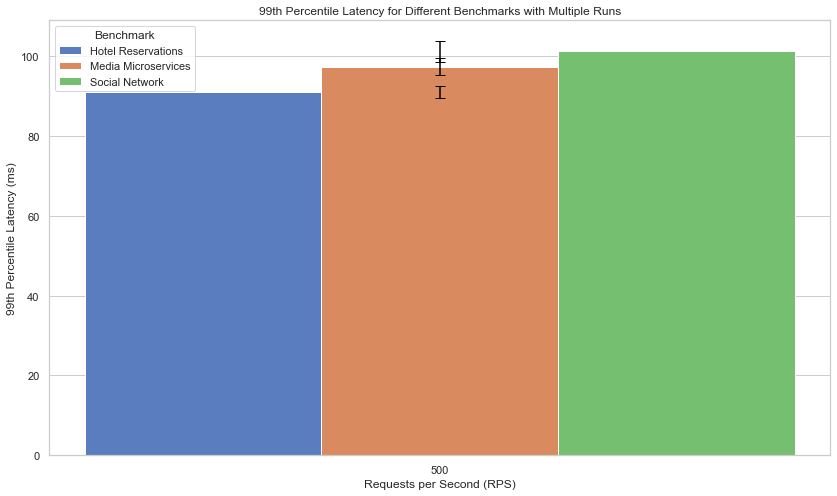

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = {
    'Benchmark': [
        'Social Network', 'Social Network', 'Social Network', 'Social Network', 'Social Network',
        'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices',
        'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations',
        # Repeat for all RPS values
    ],
    'RPS': [
        500, 500, 500, 500, 500,
        500, 500, 500, 500, 500,
        500, 500, 500, 500, 500,
        # Repeat for all RPS values
    ],
    'Run': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Latency_99th': [100, 105, 98, 102, 101, 95, 97, 96, 99, 100, 90, 93, 89, 91, 92]
    # Repeat for all RPS values and benchmarks
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate mean and standard deviation for each benchmark and RPS
df_agg = df.groupby(['Benchmark', 'RPS']).agg(
    Latency_Mean=('Latency_99th', 'mean'),
    Latency_SD=('Latency_99th', 'std')
).reset_index()

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot with error bars
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(
    x='RPS', 
    y='Latency_Mean', 
    hue='Benchmark', 
    data=df_agg, 
    ci=None,
    palette='muted'
)

# Add error bars
for i in range(df_agg.shape[0]):
    row = df_agg.iloc[i]
    bar_plot.errorbar(
        x=i // 3,  # Position for x
        y=row['Latency_Mean'],
        yerr=row['Latency_SD'],
        fmt='none',
        c='black',
        capsize=5
    )

# Customize the plot
bar_plot.set_title('99th Percentile Latency for Different Benchmarks with Multiple Runs')
bar_plot.set_xlabel('Requests per Second (RPS)')b
bar_plot.set_ylabel('99th Percentile Latency (ms)')
plt.legend(title='Benchmark')

# Show the plot
plt.show()

### Explanation:
# 1. **Data Aggregation**: We group the data by `Benchmark` and `RPS`, and then calculate the mean and standard deviation of the 99th percentile latency for each group.
# 2. **Seaborn Setup**: We set the style of the plot using `sns.set(style="whitegrid")`.
# 3. **Bar Plot**: We create the bar plot with `sns.barplot`, using the aggregated mean latency.
# 4. **Error Bars**: We add error bars to represent the standard deviation for each group using a loop to ensure each bar has error bars.
# 5. **Customization**: We set the title, X-axis label, Y-axis label, and legend for clarity.
# 6. **Display**: Lastly, we display the plot using `plt.show()`.



In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data with multiple RPS values and runs
data = {
    'Benchmark': [
        'Social Network', 'Social Network', 'Social Network', 'Social Network', 'Social Network',
        'Social Network', 'Social Network', 'Social Network', 'Social Network', 'Social Network',
        'Social Network', 'Social Network', 'Social Network', 'Social Network', 'Social Network',
        'Social Network', 'Social Network', 'Social Network', 'Social Network', 'Social Network',
         'Social Network', 'Social Network', 'Social Network', 'Social Network', 'Social Network',

        'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices',
        'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices',
        'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices',
        'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices',
        'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices',

        'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations',
        'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations',
        'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations',
        'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations',
        'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations'
    ],

    'RPS': [
        500, 500, 500, 500, 500,
        1000, 1000, 1000, 1000, 1000,
        2000, 2000, 2000, 2000, 2000,
        3000, 3000, 3000, 3000, 3000,
        4000, 4000, 4000, 4000, 4000,

        500, 500, 500, 500, 500,
        1000, 1000, 1000, 1000, 1000,
        2000, 2000, 2000, 2000, 2000,
        3000, 3000, 3000, 3000, 3000,
        4000, 4000, 4000, 4000, 4000,

        500, 500, 500, 500, 500,
        1000, 1000, 1000, 1000, 1000,
        2000, 2000, 2000, 2000, 2000,
        3000, 3000, 3000, 3000, 3000,
        4000, 4000, 4000, 4000, 4000
    ],

    'Run': [1, 2, 3, 4, 5] * 5 * 3,
    
    'Latency_99th': [
        100, 105, 98, 102, 101, 110, 107, 112, 108, 109, 120, 118, 115, 117, 119, 130, 128, 132, 129, 131, 140, 138, 137, 139, 141,
        95, 97, 96, 99, 100, 105, 103, 108, 106, 107, 115, 113, 117, 116, 118, 125, 123, 127, 126, 129, 135, 133, 137, 136, 138,
        90, 93, 89, 91, 92, 100, 98, 101, 99, 102, 110, 108, 112, 111, 113, 120, 118, 122, 121, 123, 130, 128, 132, 131, 134
    ]
}


In [105]:
print(len(data['Benchmark']), len(data['RPS']),  len(data['Run']), len(data['Latency_99th']))

75 75 75 75


In [112]:
x_pos = df_agg['RPS'].unique().tolist().index(row['RPS'])
print(x_pos) + 

4


              Benchmark   RPS  Run  Latency_99th
0        Social Network   500    1           100
1        Social Network   500    2           105
2        Social Network   500    3            98
3        Social Network   500    4           102
4        Social Network   500    5           101
15       Social Network  1000    1           110
16       Social Network  1000    2           108
17       Social Network  1000    3           112
18       Social Network  1000    4           111
19       Social Network  1000    5           109
5   Media Microservices   500    1            95
6   Media Microservices   500    2            97
7   Media Microservices   500    3            96
8   Media Microservices   500    4            99
9   Media Microservices   500    5           100
20  Media Microservices  1000    1           100
21  Media Microservices  1000    2           102
22  Media Microservices  1000    3            99
23  Media Microservices  1000    4           101
24  Media Microservi

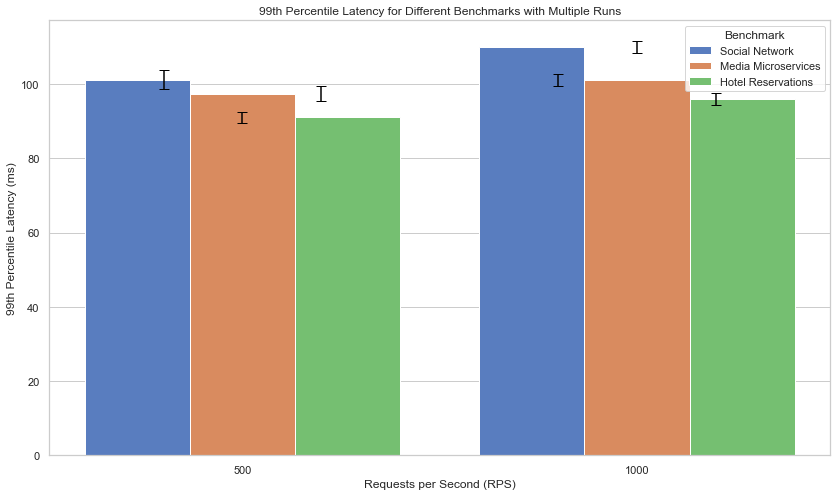

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = {
    'Benchmark': [
        'Social Network', 'Social Network', 'Social Network', 'Social Network', 'Social Network',
        'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices',
        'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations',
        'Social Network', 'Social Network', 'Social Network', 'Social Network', 'Social Network',
        'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices',
        'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations'
        # Repeat for all RPS values and benchmarks
    ],
    'RPS': [
        500, 500, 500, 500, 500,
        500, 500, 500, 500, 500,
        500, 500, 500, 500, 500,
        1000, 1000, 1000, 1000, 1000,
        1000, 1000, 1000, 1000, 1000,
        1000, 1000, 1000, 1000, 1000,
        # Add more RPS values here
    ],
    'Run': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Latency_99th': [
        100, 105, 98, 102, 101,
        95, 97, 96, 99, 100,
        90, 93, 89, 91, 92,
        110, 108, 112, 111, 109,
        100, 102, 99, 101, 103,
        95, 97, 94, 96, 98
        # Add more latency values here
    ]
}

# Create DataFrame
df = pd.DataFrame(data)
df['Benchmark'] = pd.Categorical(df['Benchmark'], df['Benchmark'].unique())
# df['RPS'] = pd.Categorical(df['RPS'], df['RPS'].unique())
df = df.sort_values(['Benchmark', 'RPS'])

print(df)

# Calculate mean and standard deviation for each benchmark and RPS
df_agg = df.groupby(['Benchmark', 'RPS']).agg(
    Latency_Mean=('Latency_99th', 'mean'),
    Latency_SD=('Latency_99th', 'std')
).reset_index()

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(
    x='RPS', 
    y='Latency_Mean', 
    hue='Benchmark', 
    data=df_agg, 
    ci="sd",
    palette='muted'
)


# Add error bars
for i in range(df_agg.shape[0]):
    row = df_agg.iloc[i]
    x_pos = df_agg['RPS'].unique().tolist().index(row['RPS']) + (i % 3) * 0.2 - 0.2  # Adjust positions for error bars
    bar_plot.errorbar(
        x=x_pos, 
        y=row['Latency_Mean'],
        yerr=row['Latency_SD'],
        fmt='none',
        c='black',
        capsize=5
    )


# Customize the plot
plt.title('99th Percentile Latency for Different Benchmarks with Multiple Runs')
plt.xlabel('Requests per Second (RPS)')
plt.ylabel('99th Percentile Latency (ms)')
plt.legend(title='Benchmark')

# Show the plot
plt.show()


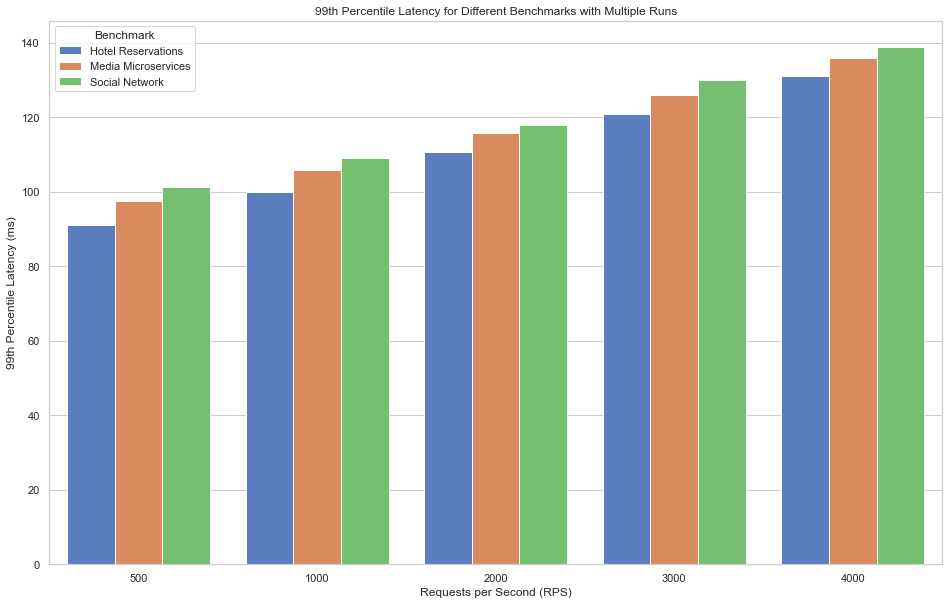

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data with multiple RPS values and runs
data = {
    'Benchmark': [
        'Social Network', 'Social Network', 'Social Network', 'Social Network', 'Social Network',
        'Social Network', 'Social Network', 'Social Network', 'Social Network', 'Social Network',
        'Social Network', 'Social Network', 'Social Network', 'Social Network', 'Social Network',
        'Social Network', 'Social Network', 'Social Network', 'Social Network', 'Social Network',
        'Social Network', 'Social Network', 'Social Network', 'Social Network', 'Social Network',

        'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices',
        'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices',
        'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices',
        'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices',        
        'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices', 'Media Microservices',

        'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations',
        'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations',
        'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations',
        'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations',
        'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations', 'Hotel Reservations'
    ],

    'RPS': [
        500, 500, 500, 500, 500,
        1000, 1000, 1000, 1000, 1000,
        2000, 2000, 2000, 2000, 2000,
        3000, 3000, 3000, 3000, 3000,
        4000, 4000, 4000, 4000, 4000,

        500, 500, 500, 500, 500,
        1000, 1000, 1000, 1000, 1000,
        2000, 2000, 2000, 2000, 2000,
        3000, 3000, 3000, 3000, 3000,
        4000, 4000, 4000, 4000, 4000,

        500, 500, 500, 500, 500,
        1000, 1000, 1000, 1000, 1000,
        2000, 2000, 2000, 2000, 2000,
        3000, 3000, 3000, 3000, 3000,
        4000, 4000, 4000, 4000, 4000
    ],

    'Run': [1, 2, 3, 4, 5] * 5 * 3,
    
    'Latency_99th': [
        100, 105, 98, 102, 101, 110, 107, 112, 108, 109, 120, 118, 115, 117, 119, 130, 128, 132, 129, 131, 140, 138, 137, 139, 141,
        95, 97, 96, 99, 100, 105, 103, 108, 106, 107, 115, 113, 117, 116, 118, 125, 123, 127, 126, 129, 135, 133, 137, 136, 138,
        90, 93, 89, 91, 92, 100, 98, 101, 99, 102, 110, 108, 112, 111, 113, 120, 118, 122, 121, 123, 130, 128, 132, 131, 134
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate mean and standard deviation for each benchmark and RPS
df_agg = df.groupby(['Benchmark', 'RPS']).agg(
    Latency_Mean=('Latency_99th', 'mean'),
    Latency_SD=('Latency_99th', 'std')
).reset_index()

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot with error bars
plt.figure(figsize=(16, 10))
bar_plot = sns.barplot(
    x='RPS', 
    y='Latency_Mean', 
    hue='Benchmark', 
    data=df_agg, 
    ci="sd",
    palette='muted'
)

# # Add error bars
# for i in range(df_agg.shape[0]):
#     row = df_agg.iloc[i]
#     x_pos = df_agg['RPS'].unique().tolist().index(row['RPS']) + (i % 3) * 0.2 - 0.2  # Adjust positions for error bars
#     bar_plot.errorbar(
#         x=x_pos, 
#         y=row['Latency_Mean'],
#         yerr=row['Latency_SD'],
#         fmt='none',
#         c='black',
#         capsize=5
#     )

# Customize the plot
bar_plot.set_title('99th Percentile Latency for Different Benchmarks with Multiple Runs')
bar_plot.set_xlabel('Requests per Second (RPS)')
bar_plot.set_ylabel('99th Percentile Latency (ms)')
plt.legend(title='Benchmark')

# Show the plot
plt.show()

In [91]:
df_test.loc[[3,41,46,48,50],'Latency'] 


3     6.61
41    3.49
46    3.51
48    3.77
50    4.47
Name: Latency, dtype: float64

In [92]:
# df.loc[:,['Latency', 'Connections', 'Benchmark']].head(35).sort_values('Benchmark')
df_test = df.loc[(df['Exp'] != 'exp12') & (df['Exp'] != 'exp13') & (df['Exp'] != 'exp14') & (df['Exp'] != 'exp15') 
                 & (df['Benchmark'] == 'mm') ].reset_index(drop=True)
df_test.shape
pd.set_option('display.max_rows', None)

df_test.loc[:,['Latency', 'Connections', 'Benchmark', 'Requests']].head(92).sort_values('Connections').sort_values('Latency')

# df_test_con = df_test[
# df.loc[:,['Latency', 'Connections', 'Benchmark','Exp']].head(35).sort_values('Benchmark')


,Latency,Connections,Benchmark,Requests
41,3.49,512,mm,500
46,3.51,1024,mm,500
43,3.51,1024,mm,500
40,3.57,1024,mm,500
44,3.59,512,mm,500
47,3.61,512,mm,500
79,3.67,512,mm,500
81,3.70,512,mm,500
80,3.74,512,mm,500
48,3.77,128,mm,500


In [32]:
df_1.loc[:,['Latency', 'Connections', 'Benchmark']].head(35).sort_values('Benchmark')

,Latency,Connections,Benchmark
0,9.15,16,hr
14,10.04,512,hr
13,11.38,128,hr
12,10.70,1024,hr
90,38.01,8,hr
31,1590.00,8,hr
15,11.57,2048,hr
8,9.26,16,hr
46,9.94,8,hr
65,12.34,8,hr


In [24]:
print(df_1.head())
print(df_1.shape)

   Latency  Requests  Throughput  Measured_Throughput  Baseline Orchestrator  \
0     9.15       200      5755.0                 3827         0        swarm   
1     6.70       200      5755.0                 3826         0        swarm   
2     6.74       200      5995.0                 3992         0        swarm   
3     6.61       200      5995.0                 3992         0        swarm   
4     8.01       200      5755.0                 3826         0        swarm   

  Benchmark  Infinite   Exp   N  Availability  Horizontal  Vertical  Threads  \
0        hr         1  exp1 NaN             0           1         1       16   
1        mm         1  exp1 NaN             0           1         1       16   
2        mm         1  exp1 NaN             0           1         1        4   
3        mm         1  exp1 NaN             0           1         1        8   
4        sn         1  exp1 NaN             0           1         1       16   

   Connections  Duration   Mean     Ma

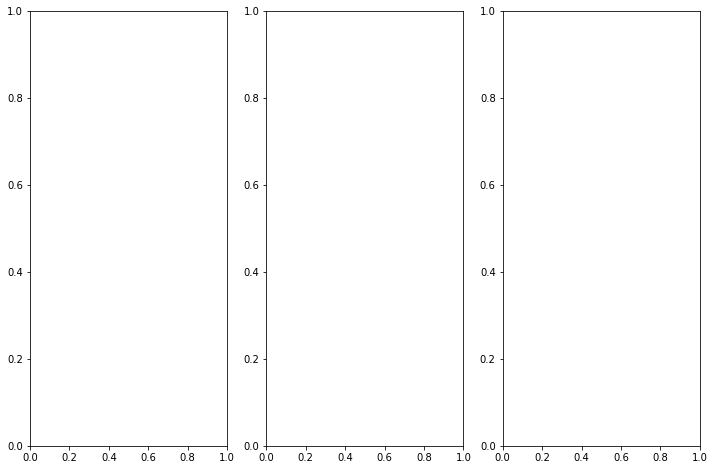

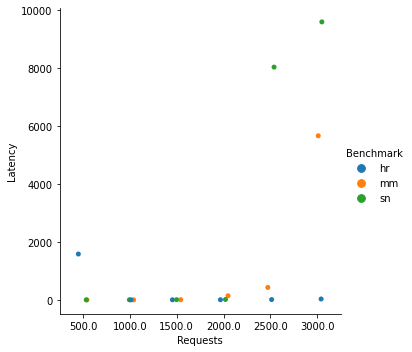

In [111]:
fig, ax = plt.subplots(1,3, figsize=(12,8))
plt.figure(1)
plt.subplot(131)
ax1 = sns.catplot(x="Requests", y="Latency", data=df_1_req, hue="Benchmark")
# ax1.legend(fontsize=15)
# plt.subplot(132)
# ax2 = sns.barplot(x="Threads", y="Latency", data=df_1_thr, hue="Benchmark")
# ax2.get_legend().remove()
# ax2.set_ylabel("")
# plt.subplot(133)
# ax3 = sns.barplot(x="Connections", y="Latency", data=df_1_con, hue="Benchmark")
# ax3.get_legend().remove()


In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

# p1 = ax.bar(labels[0], df['Latency'][0], label=labels[0])
# p2 = ax.bar(labels[1], df['Latency'][1], label=labels[1])
# p3 = ax.bar(labels[2], df['Latency'][2], label=labels[2])
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='edge', fontsize=fontsize)
ax.bar_label(p2, label_type='edge', fontsize=fontsize)
ax.bar_label(p3, label_type='edge', fontsize=fontsize)


plt.ylim(0,15)
# ax.grid()
xticks = [int(tick) for tick in ax.get_xticks()]
ax.set_xlabel('Benchmarks', fontsize=fontsize)
ax.set_ylabel('Latency (milliseconds)', fontsize=fontsize+5)

plt.yticks(fontsize=fontsize)
plt.xticks(xticks, fontsize=fontsize)
plt.legend(loc="upper right", fontsize=fontsize+5)

plt.tight_layout()
plt.savefig("Figures/exp0.png", bbox_inches='tight')

plt.show()
